# CMIP6 precipitation flux for a single model over Ghana

2020/5/20, Leif

My first example of making a plot using the global dataset

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.feature as cf

**CMIP6:** 

Historical runs (1850-2014) are in `/badc/cmip6/data/CMIP6/CMIP/<institute>/<model>/historical/<variant>/<table_id>/<variable>/<grid>/<version>/`

Scenario runs are in `/badc/cmip6/data/CMIP6/ScenarioMIP/<institute>/<model>/<scenario_name>/<variant>/<table_id>/<variable>/<grid>/<version>/`
`scenario_name` is likely to be one of ssp119, ssp126, ssp245, ssp370 or ssp585

`variant` takes the form `r<realiation_id>0<initialization_id>0<physics_id>0<forcing_id>`, e.g. `r1i1p1f2`, where the numbers are the indexes for:  
**r**ealization, **i**nitialization, **p**hysics, **f**orcing

`table_id` generally indicates the frequency of the data, e.g. day, 3hr, Amon

`grid` is the model grid being used, e.g. gn, where  
   * `gm`: global mean data  
   * `gn`: data reported on a model's native grid  
   * `gr1`: regridded data reported on a grid other than the native grid and other than the preferred target grid  
It is likely the `grid` will be the native grid, i.e. `gn`

`version` normally in the form `v[YYYYMMDD]` or `latest`, e.g. `v20200203`


The following institutions have data in both historical and ScenarioMIPs:
AS-RCEC, AWI, BCC, CAMS, CAS, CCCR-IITM, CCCma, CMCC, CNRM-CERFACS, CSIRO, CSIRO-ARCCSS, E3SM-Project, EC-Earth-Consortium, FIO-QLNM, HAMMOZ-Consortium, INM, IPSL, KIOST, MIROC, MOHC, MPI-M, MRI, NASA-GISS, NCAR, NCC, NIMS-KMA, NOAA-GFDL, NUIST, THU, UA

Any CMIP6 data that is pre-processed should be stored in the group workspace `/gws/pw/j05/cop26_hackathons/leeds/`. For data that is useful to all teams this should be organised in a similar way to the CMIP6 data so it is clear where it came form, i.e. for future scenarios this is `/gws/pw/j05/cop26_hackathons/leeds/<institute>/<model>/<scenario_name>/<variant>/<version>/<variable>/`.
For historical data this is
`/gws/pw/j05/cop26_hackathons/leeds/<institute>/<model>/historical/<variant>/<version>/<variable>/`.
For data that is specific to the team, please store it under `/gws/pw/j05/cop26_hackathons/leeds/<team_name>/`.

We have pre-processed some HadGEM3 data to test our provided stats code and stored it in the group workspace. For example the 50th percentile of future tasmax is stored in tasmax_50th_percentile_2050-2079_*{m}*_*{region_str}*  (2050-2079 was used for future and 1985-2014 for current), `m` is is the month and `region_str` is the region for which we extracted data covering Africa, i.e. 20W55E_30S30N.


In [2]:
from pathlib import Path

DATA_ROOT = Path("/badc/cmip6/data/CMIP6/")

def make_cmip6_filepath(institute, model, scenario, variant, experiment, table_id, variable, grid, version, time_range, data_root=DATA_ROOT):
    """
    Make a file path for a cmip6 dataset for a single variable
    Historical runs (1850-2014) are in `/badc/cmip6/data/CMIP6/CMIP/<institute>/<model>/historical/<variant>/<table_id>/<variable>/<grid>/<version>/`

    Scenario runs are in `/badc/cmip6/data/CMIP6/ScenarioMIP/<institute>/<model>/<scenario_name>/<variant>/<table_id>/<variable>/<grid>/<version>/`
    `scenario_name` is likely to be one of ssp119, ssp126, ssp245, ssp370 or ssp585

    `variant` takes the form `r<realiation_id>0<initialization_id>0<physics_id>0<forcing_id>`, e.g. `r1i1p1f2`, where the numbers are the indexes for:  
    **r**ealization, **i**nitialization, **p**hysics, **f**orcing

    `table_id` generally indicates the frequency of the data, e.g. day, 3hr, Amon

    `grid` is the model grid being used, e.g. gn, where  
       * `gm`: global mean data  
       * `gn`: data reported on a model's native grid  
       * `gr1`: regridded data reported on a grid other than the native grid and other than the preferred target grid  
    It is likely the `grid` will be the native grid, i.e. `gn`

    `version` normally in the form `v[YYYYMMDD]` or `latest`, e.g. `v20200203
    
    `variable` generally follows the list on https://pcmdi.llnl.gov/mips/cmip3/variableList.html, for example 
       `tas`: air_temperature 
       `pr`: precipitation_flux
       `ts`: surface_temperature

    The following institutions have data in both historical and ScenarioMIPs:
    AS-RCEC, AWI, BCC, CAMS, CAS, CCCR-IITM, CCCma, CMCC, CNRM-CERFACS, CSIRO, CSIRO-ARCCSS, E3SM-Project, EC-Earth-Consortium, FIO-QLNM, HAMMOZ-Consortium, INM, IPSL, KIOST, MIROC, MOHC, MPI-M, MRI, NASA-GISS, NCAR, NCC, NIMS-KMA, NOAA-GFDL, NUIST, THU, UA
    """
    path = DATA_ROOT / scenario / institute / model / experiment / variant / table_id / variable / grid / version
    filename = f"{variable}_{table_id}_{model}_{experiment}_{variant}_{grid}_{time_range}.nc"
    
    return path / filename

In [3]:
model = "HadGEM3-GC31-LL"
experiment = "ssp585"

fp = make_cmip6_filepath(
    institute="MOHC", scenario="ScenarioMIP", model=model, experiment=experiment, variant="r1i1p1f3",
    table_id="day", variable="pr", grid="gn", version="v20200114", time_range="*"
)
list(fp.parent.glob(fp.name))

[PosixPath('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/HadGEM3-GC31-LL/ssp585/r1i1p1f3/day/pr/gn/v20200114/pr_day_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_20150101-20491230.nc'),
 PosixPath('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/HadGEM3-GC31-LL/ssp585/r1i1p1f3/day/pr/gn/v20200114/pr_day_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_20500101-21001230.nc')]

In [4]:
fp = make_cmip6_filepath(
    institute="MOHC", scenario="ScenarioMIP", model="HadGEM3-GC31-LL", experiment="ssp585", variant="r1i1p1f3",
    table_id="day", variable="pr", grid="gn", version="v20200114", time_range="20150101-20491230"
)

ds = xr.open_dataset(fp, chunks=dict(time=1000))
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, time: 12600)
Coordinates:
  * time       (time) object 2015-01-01 12:00:00 ... 2049-12-30 12:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(1000, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(144, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
    pr         (time, lat, lon) float32 dask.array<chunksize=(1000, 144, 192), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   59400.0
    branch_time_in_parent:  59400.0
    creation_date:          2020-01-13T08:48:38Z
    cv_version:             6.2.37.5
    data_specs_version:     01.00.29
    experiment:             update of RCP8.5 based on SSP5
    experiment_id:          ssp585
    external_variables:     areacella
    forcing_index:          3
    frequency:              day
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.MOHC.HadGEM3...
    grid:                   Native N96 grid; 192 x 144 longitude/latitude
    grid_label:             gn
    history:                2020-01-13T08:37:14Z ; CMOR rewrote data to be co...
    initialization_index:   1
    institution:            Met Office Hadley Centre, Fitzroy Road, Exeter, D...
    institution_id:         MOHC
    mip_era:                CMIP6
    mo_runid:               u-bi805
    nominal_resolution:     250 km
    parent_activity_id:     CMIP
    parent_experiment_id:   historical
    parent_mip_era:         CMIP6
    parent_source_id:       HadGEM3-GC31-LL
    parent_time_units:      days since 1850-01-01
    parent_variant_label:   r1i1p1f3
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos
    source:                 HadGEM3-GC31-LL (2016): \naerosol: UKCA-GLOMAP-mo...
    source_id:              HadGEM3-GC31-LL
    source_type:            AOGCM AER
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               day
    table_info:             Creation Date:(13 December 2018) MD5:f0588f7f55b5...
    title:                  HadGEM3-GC31-LL output prepared for CMIP6
    tracking_id:            hdl:21.14100/f2749336-9ca0-4fe4-8890-26bf98f8cf7d
    variable_id:            pr
    variable_name:          pr
    variant_label:          r1i1p1f3
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0

In [5]:
# this a bit hacky, I just wanted to use cdo to make a selection that spans the equator
!cdo -f nc -sellonlatbox,-20,20,-10,30 {fp} tempfile.nc

cdo sellonlatbox: Processed 348364800 values from 1 variable over 12600 timesteps [31.60s 173MB]


In [6]:
ds = xr.open_dataset("tempfile.nc")
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 32, lon: 22, time: 12600)
Coordinates:
  * time       (time) object 2015-01-01 12:00:00 ... 2049-12-30 12:00:00
  * lon        (lon) float64 -19.69 -17.81 -15.94 -14.06 ... 15.94 17.81 19.69
  * lat        (lat) float64 -9.375 -8.125 -6.875 -5.625 ... 26.88 28.12 29.38
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes:
    CDI:                    Climate Data Interface version 1.9.5 (http://mpim...
    Conventions:            CF-1.7 CMIP-6.2
    history:                Thu May 20 09:56:18 2021: cdo -f nc -sellonlatbox...
    source:                 HadGEM3-GC31-LL (2016): \naerosol: UKCA-GLOMAP-mo...
    institution:            Met Office Hadley Centre, Fitzroy Road, Exeter, D...
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   59400.0
    branch_time_in_parent:  59400.0
    creation_date:          2020-01-13T08:48:38Z
    cv_version:             6.2.37.5
    data_specs_version:     01.00.29
    experiment:             update of RCP8.5 based on SSP5
    experiment_id:          ssp585
    external_variables:     areacella
    forcing_index:          3
    frequency:              day
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.MOHC.HadGEM3...
    grid:                   Native N96 grid; 192 x 144 longitude/latitude
    grid_label:             gn
    initialization_index:   1
    institution_id:         MOHC
    mip_era:                CMIP6
    mo_runid:               u-bi805
    nominal_resolution:     250 km
    parent_activity_id:     CMIP
    parent_experiment_id:   historical
    parent_mip_era:         CMIP6
    parent_source_id:       HadGEM3-GC31-LL
    parent_time_units:      days since 1850-01-01
    parent_variant_label:   r1i1p1f3
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos
    source_id:              HadGEM3-GC31-LL
    source_type:            AOGCM AER
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               day
    table_info:             Creation Date:(13 December 2018) MD5:f0588f7f55b5...
    title:                  HadGEM3-GC31-LL output prepared for CMIP6
    tracking_id:            hdl:21.14100/f2749336-9ca0-4fe4-8890-26bf98f8cf7d
    variable_id:            pr
    variable_name:          pr
    variant_label:          r1i1p1f3
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    CDO:                    Climate Data Operators version 1.9.5 (http://mpim...

In [7]:
import cartopy.crs as ccrs

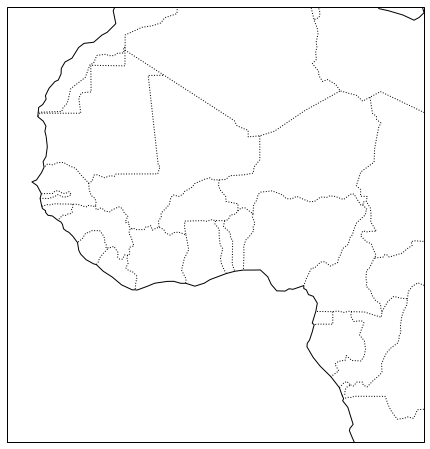

In [8]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.add_feature(cf.BORDERS, linestyle=":")
ax.coastlines()
ax.set_extent([-20, 20, -10, 30])

In [9]:
bbox = dict(lat=slice(-10, 30), lon=slice(-20, 20))

In [10]:
def crop_field(da, bbox_domain):
    lat = bbox_domain["lat"]
    lon = bbox_domain["lon"]

    da_ = (
        da.sel(lat=lat)
        .roll(dict(lon=len(da.lon) // 2), roll_coords=True)
    )
    da_ = da_.assign_coords(lon=da_.lon.where(da_.lon < 180.0, da_.lon - 360.0))
    da_ = da_.sel(lon=lon)
    return da_


In [11]:
#da_ = crop_field(ds.pr, bbox)
ds_bbox = ds.sel(**bbox)

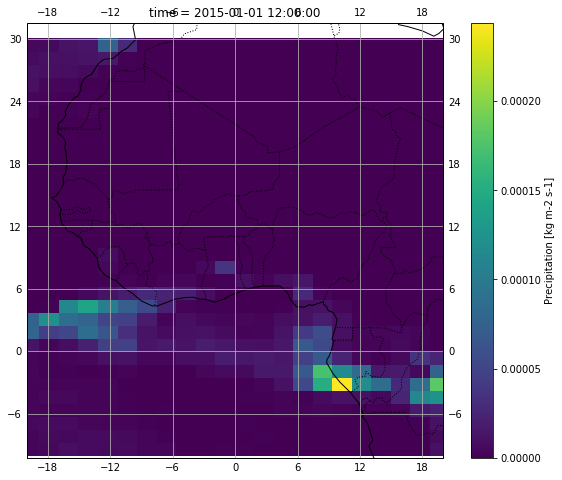

In [12]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=":")
ax.gridlines(draw_labels=True)
ax.set_extent([-20, 20, -10, 30])

da_pr = ds_bbox.pr
da_pr.isel(time=0).plot.pcolormesh(transform=ccrs.PlateCarree(), ax=ax)

In [13]:
def bbox_to_rect(bbox, edgecolor="red", facecolor="none", **kwargs):
    w, h = bbox["lon"].stop - bbox["lon"].start, bbox["lat"].stop - bbox["lat"].start
    return mpatches.Rectangle((bbox["lon"].start, bbox["lat"].start), w, h, edgecolor=edgecolor, facecolor=facecolor, **kwargs)

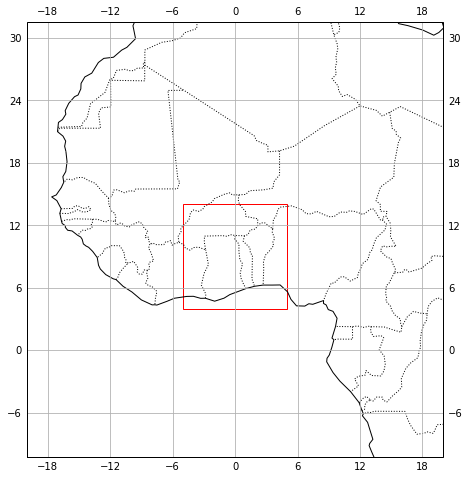

In [14]:
bbox_ghana = dict(lat=slice(4, 14), lon=slice(-5, 5))

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=":")
ax.gridlines(draw_labels=True)
ax.set_extent([-20, 20, -10, 30])
ax.add_patch(bbox_to_rect(bbox_ghana))

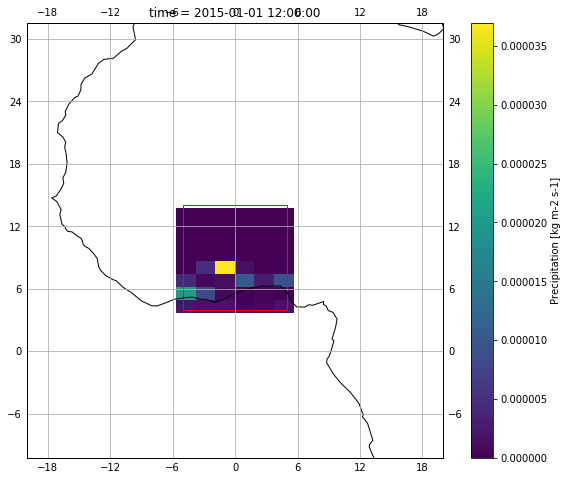

In [15]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_extent([-20, 20, -10, 30])
ax.add_patch(bbox_to_rect(bbox_ghana))

ds_ghana = ds.sel(**bbox_ghana)
ds_ghana.isel(time=0).pr.plot(ax=ax)

In [16]:
da_ghana_pr_per_year = ds_ghana.sum(dim=("lat", "lon")).groupby("time.year").sum().pr

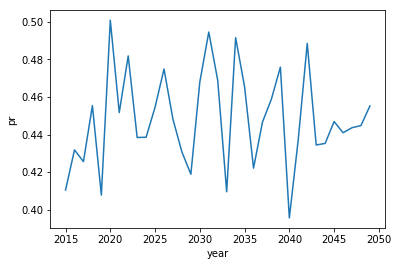

In [17]:
da_ghana_pr_per_year.plot()

In [18]:
ds_ = ds_ghana.copy()
ds_["year"] = ds_.time.dt.year
ds_["dayofyear"] = ds_.time.dt.dayofyear

ds_by_year = ds_.set_index(time=["year", "dayofyear"]).unstack("time")
ds_by_year_sum = ds_by_year.sum(dim=("lat", "lon"))
ds_by_year_sum

<xarray.Dataset>
Dimensions:    (bnds: 2, dayofyear: 360, year: 35)
Coordinates:
  * year       (year) int64 2015 2016 2017 2018 2019 ... 2046 2047 2048 2049
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 354 355 356 357 358 359 360
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (bnds) float64 -5.625 5.625
    lat_bnds   (bnds) float64 65.0 75.0
    pr         (year, dayofyear) float32 0.0001106 0.0004234 ... 3.257e-05

In [19]:
ds_by_year_sum

<xarray.Dataset>
Dimensions:    (bnds: 2, dayofyear: 360, year: 35)
Coordinates:
  * year       (year) int64 2015 2016 2017 2018 2019 ... 2046 2047 2048 2049
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 354 355 356 357 358 359 360
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (bnds) float64 -5.625 5.625
    lat_bnds   (bnds) float64 65.0 75.0
    pr         (year, dayofyear) float32 0.0001106 0.0004234 ... 3.257e-05

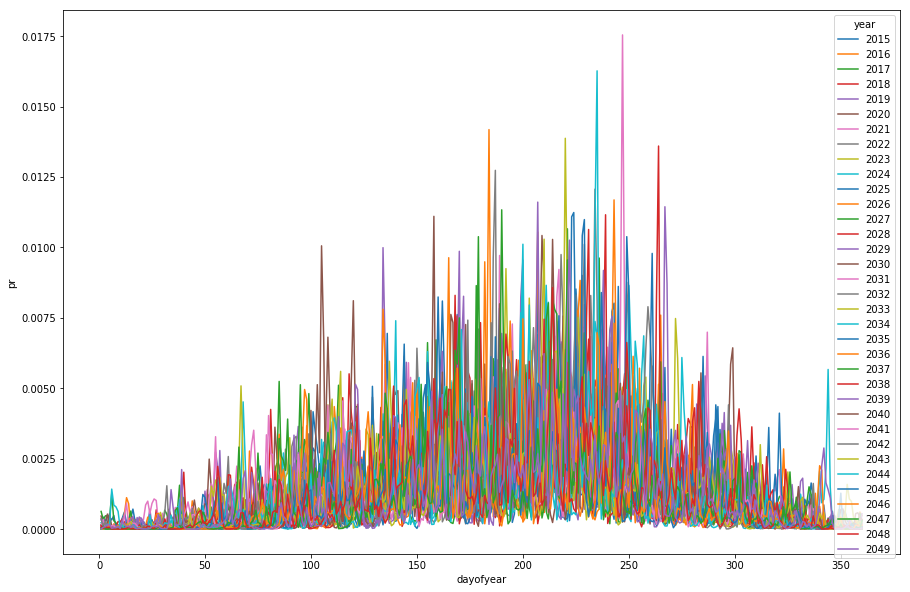

In [20]:
_ = ds_by_year_sum.pr.plot(hue="year", size=10)

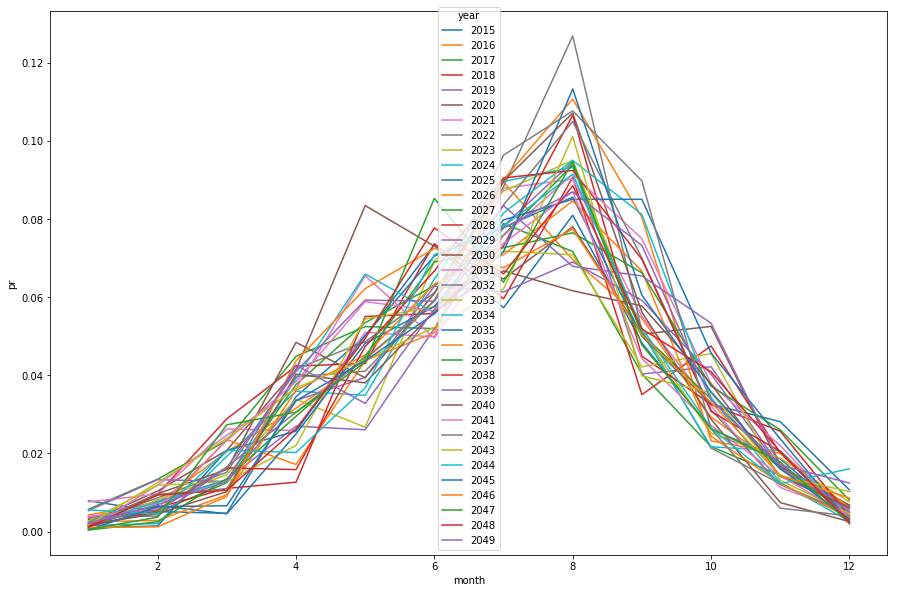

In [21]:
def _sum_by_month(ds_):
    return ds_.groupby("time.month").sum()

ds_by_month_year = ds_ghana.sum(dim=("lat", "lon")).groupby("time.year").apply(_sum_by_month)
_ = ds_by_month_year.pr.plot(hue="year", size=10)

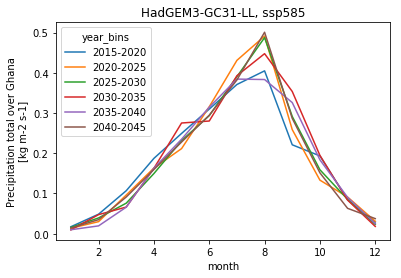

In [22]:

year_bins = np.arange(ds_by_month_year.year.min(), ds_by_month_year.year.max(), 5)
year_bin_labels = ["{}-{}".format(a, b) for (a, b) in zip(year_bins[:-1], year_bins[1:])]

ds_ = ds_by_month_year.groupby_bins("year", year_bins, labels=year_bin_labels).sum()
#_ = ds_.pr.plot(hue="year", size=10)
da_ = ds_.pr
da_.attrs["long_name"] = f"{ds.pr.long_name} total over Ghana"
da_.attrs["units"] = ds.pr.units
da_.plot(hue="year_bins")

plt.title(f"{model}, {experiment}")
plt.savefig("ghana_total_precip_hadgem3.png", dpi=200)